In [4]:
%matplotlib notebook
from pylab import *
from IPython.display import display, Latex
import ipywidgets as widgets

In [91]:
%%html
<style>
div.input{
    display:none;
}
</style>

<IPython.core.display.Javascript object>


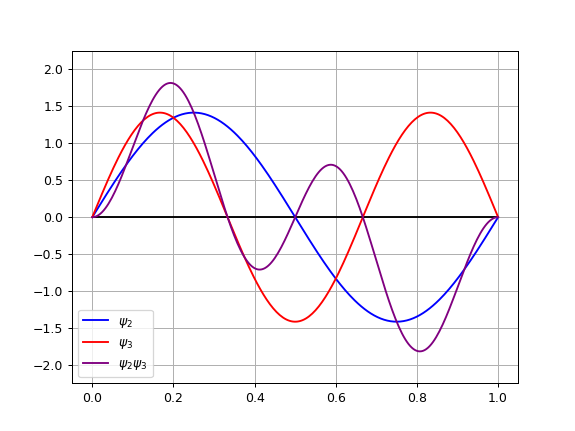

In [90]:
# set up wavefunctions, outline of well

figure("Wavefunctions of the Particle in a Box")
limits = (0, 1)
x = linspace(*limits, 250)

def wf(x, n = 1, a = 1):
    return sqrt(2/a) * sin(n*pi*x/a)
                   
def plotPsi(nlist = range(1, 5), squared=False):
    power = 2 if squared else 1
    color = 'purple' if squared else 'blue'
    for n in nlist:
        plot(x, wf(x, n)**power + E(n), color = color)
        
def plotWaveFunctions(n1 = 1, n2 = 1, showProduct = False, showAreas = False):
    ax = gca()
    ax.cla()
    y1 = wf(x, n1)
    y2 = wf(x, n2)
    x_axis = zeros(len(x))
    if not showAreas:
        plot(x, y1, color = 'blue', label = r'$\psi_{%d}$' % n1)
        plot(x, y2, color = 'red', label = r'$\psi_{%d}$' % n2)
        
    if showProduct:
        y_prod = y1 * y2
        plot(x, y_prod, color = 'purple', label = r'$\psi_{%d} \psi_{%d}$' % (n1, n2) )
        
    if showAreas:
        fill_between(x, y_prod, x_axis, where=y_prod >= x_axis, facecolor = 'w', hatch = '//' )
        fill_between(x, y_prod, x_axis, where = y_prod < x_axis, facecolor = 'w', hatch = '//',
                   edgecolor = 'r' )
        
    ylim([-2.25, 2.25])
    hlines([0,], xmin = 0, xmax = 1, color = 'black')
    legend()
    grid()

plotWaveFunctions()

N = 20
drop_layout = widgets.Layout(width = '75px')
check_layout = widgets.Layout(width = '200px')
style = {'description_width': 'initial'}
label1 = widgets.HTML(value = "<font color=blue><b>first wavefunction   </b></font>")
label2 = widgets.HTML(value = "<font color=red><b>second wavefunction   </b></font>")
label2.add_class("left-spacing-class")
display(HTML("<style>.left-spacing-class {margin-left: 100px;}</style>"))
drop1 = widgets.Dropdown(options = list(range(1,N+1)), layout = drop_layout)
drop2 = widgets.Dropdown(options = list(range(1,N+1)), layout = drop_layout)
check = widgets.Checkbox(value=False, description = "Show Product", layout = check_layout)
check.width = '50px'
check2 = widgets.Checkbox(value=False, description = "Show Areas", layout = check_layout)

def select_data(change):
    n1 = drop1.value
    n2 = drop2.value
    check2.disabled = not check.value
    plotWaveFunctions(n1, n2, showProduct = check.value, showAreas = check2.value)
    
drop1.observe(select_data, names='value')
drop2.observe(select_data, names='value')
check.observe(select_data, names='value')
check2.observe(select_data, names='value')
widgets.HBox([label1, drop1, label2, drop2, check, check2])
